<a href="https://colab.research.google.com/github/ParamAhuja/DL_Notebooks/blob/main/regularizationNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pre

In [52]:
from sklearn.datasets import make_moons

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [53]:
from keras.optimizers import Adam

In [54]:
import time

In [55]:
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [56]:
X, y = make_moons(100, noise=0.25,random_state=1)

In [57]:
X.shape, y.shape

((100, 2), (100,))

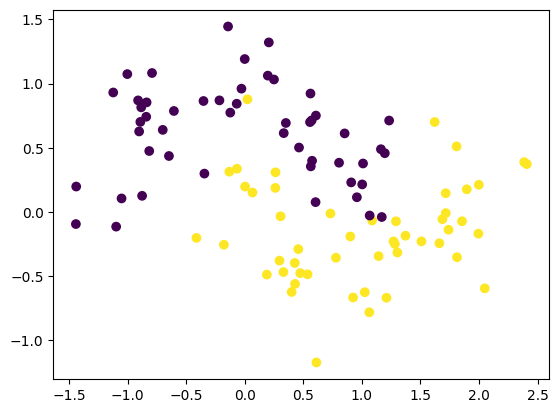

In [58]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# no regularization

In [68]:
model0 = Sequential()

model0.add(
    Dense(
        128, activation = "relu", input_dim = 2
    )
)
model0.add(
    Dense(
        128, activation = "relu"
    )
)
model0.add(
    Dense(
        1, activation = "sigmoid"
    )
)

adam = Adam(learning_rate=0.01)
model0.compile( loss = "binary_crossentropy", optimizer = adam, metrics = ["accuracy"])
model0.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
start = time.time()
hist0 = model0.fit(x = X, y = y, epochs = 2000, validation_split = 0.2, verbose = 0)
print(time.time() - start)

332.2277386188507


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step


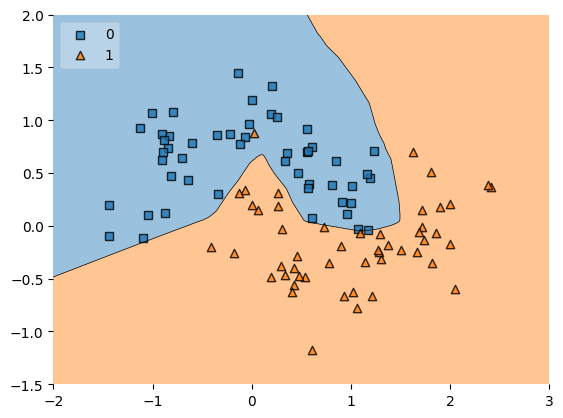

In [70]:
plot_decision_regions(X, y.astype('int'), clf=model0, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

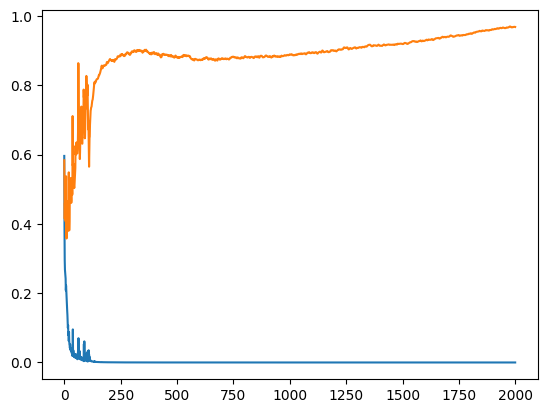

In [71]:
plt.plot(hist0.history['loss'])
plt.plot(hist0.history['val_loss'])

In [63]:
# overfitted!

# regularization (l1 - lasso)

In [77]:
model1 = Sequential()

model1.add(
    Dense(
        128, activation = "relu", input_dim = 2
        ,kernel_regularizer=tf.keras.regularizers.l1(0.001)
    )
)

# kernel_regulizer parameter
# for k2, simply change l1 to l2

model1.add(
    Dense(
        128, activation = "relu"
        ,kernel_regularizer=tf.keras.regularizers.l1(0.001)
    )
)
model1.add(
    Dense(
        1, activation = "sigmoid"
    )
)
adam = Adam(learning_rate=0.01)
model1.compile( loss = "binary_crossentropy", optimizer = adam, metrics = ["accuracy"])
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
start = time.time()
hist1 = model1.fit(x = X, y=y, epochs = 2000, verbose = 0, validation_split  = 0.2)
print(time.time() - start)

287.1494641304016


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


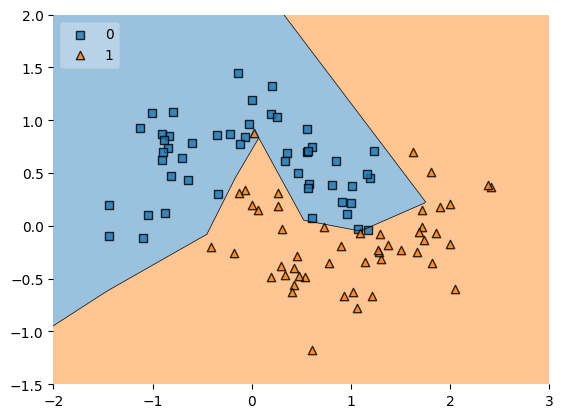

In [79]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

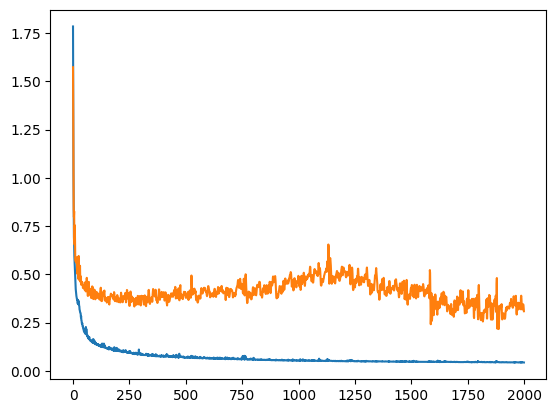

In [80]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])

In [81]:
# much better

# regularization (l2 - ridge)

In [72]:
model2 = Sequential()

model2.add(
    Dense(
        128, activation = "relu", input_dim = 2
        ,kernel_regularizer=tf.keras.regularizers.l2(0.001)
    )
)
# l2 (ridge)
model2.add(
    Dense(
        128, activation = "relu"
        ,kernel_regularizer=tf.keras.regularizers.l2(0.001)
    )
)
model2.add(
    Dense(
        1, activation = "sigmoid"
    )
)
adam = Adam(learning_rate=0.01)
model2.compile( loss = "binary_crossentropy", optimizer = adam, metrics = ["accuracy"])
model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
start = time.time()
hist2 = model2.fit(x = X, y=y, epochs = 2000, verbose = 0, validation_split  = 0.2)
print(time.time() - start)

291.44396448135376


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


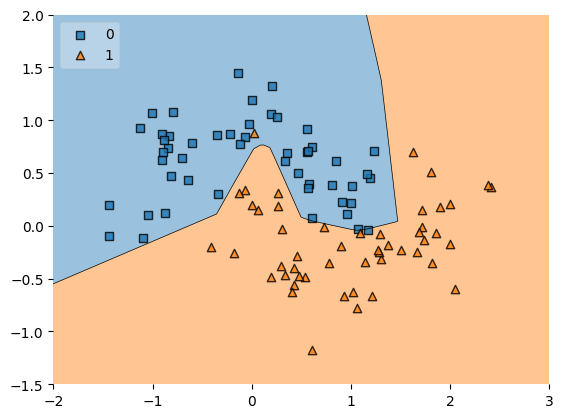

In [74]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

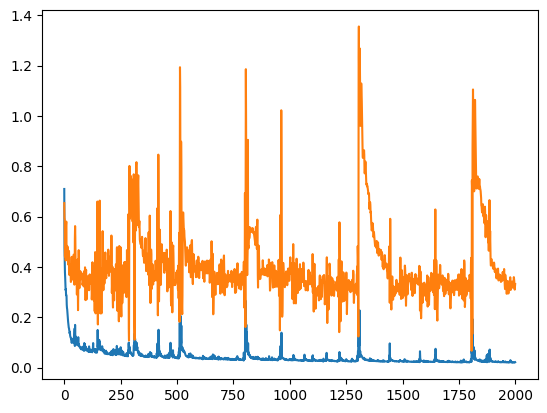

In [75]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])

In [76]:
# much much better

# compare l1 and l2

In [88]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

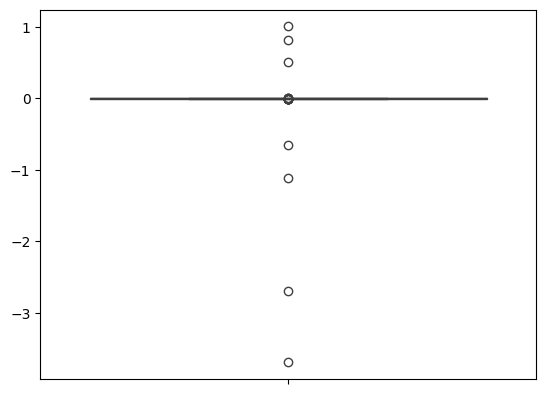

In [89]:
sns.boxplot(model1_weight_layer1)

<Axes: >

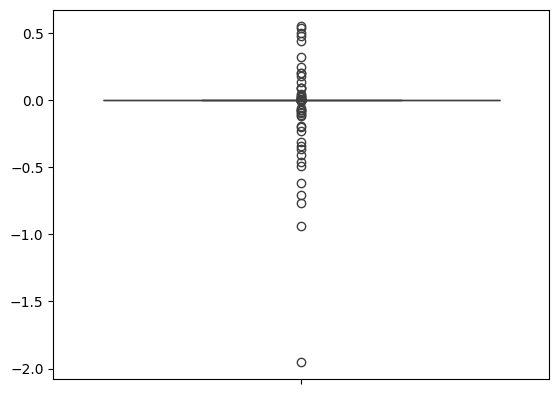

In [90]:
sns.boxplot(model2_weight_layer1)

In [91]:
model1_weight_layer1.min()

np.float32(-3.6897652)

In [92]:
model2_weight_layer1.min()

np.float32(-1.9538934)

/tmp/ipython-input-93-2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
/tmp/ipython-input-93-2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

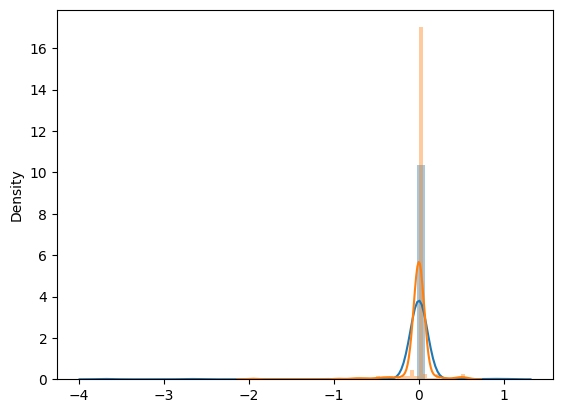

In [93]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)